<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>X XX</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 9</span>
# <span style="color:green">Network of synonyms from NLTK WordNet

In [1]:
import math, random, pickle, collections, operator, string, community #!pip install python-louvain
import itertools as it
import pandas as pd
import numpy as np
import networkx as nx
from networkx import NetworkXNoPath
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz
import matplotlib.pyplot as plt
import matplotlib as mpl
from nltk.corpus import wordnet as wn

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
def g_diagnostics(G,st):
    
    print("The %s has %i nodes and %i edges \n" %(st,len(G.nodes()), len(G.edges())))

    if G.is_directed()==True:
        print("The %s is a directed graph" %st)
    else:
        print("The %s is an undirected graph" %st)    
    if nx.is_weighted(G)==True:
        print("The %s graph is a weighted graph" %st)
    else:
        print("The %s graph is an unweighted graph" %st)
    if G.is_directed()==False:
        if nx.is_connected(G)==True:
            print("The %s is a connected graph" %st)
        else:
            print("The %s graph is a disconnected graph and it has %i connected components" %(st,nx.number_connected_components(G)))   
            giant = max(nx.connected_components(G), key=len)
            Glcc=G.subgraph(giant)
            print("The largest connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))
    else:
        if nx.is_strongly_connected(G)==True:
            print("The %s is a strongly connected graph" %st)
        else:
            print("The %s graph is not strongly connected and it has %i strongly connected components" %(st,nx.number_strongly_connected_components(G)))
            giant = max(nx.strongly_connected_components(G), key=len)
            Glcc=G.subgraph(giant)
            print("The largest strongly connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))
        if nx.is_weakly_connected(G)==True:
            print("The %s is a weakly connected graph" %st)
        else:
            print("The %s graph is not weakly connected and it has %i weakly connected components" %(st,nx.number_weakly_connected_components(G)))
            giantw = max(nx.weakly_connected_components(G), key=len)
            Glwcc=G.subgraph(giantw)
            print("The largest weakly connected component of this graph has %i nodes and %i edges" %(len(Glwcc.nodes()),len(Glwcc.edges())))
    print("The density of the %s is %.3f" %(st,nx.density(G)))   
    print("The transitivity of the %s is %.3f" %(st,nx.transitivity(G))) 
    if G.is_directed()==True:
        print("The reciprocity of the %s is %.3f" %(st,nx.reciprocity(G)))

def g_diameter(G,st):    
    try:
        diameter=nx.diameter(G)
        print("The diameter of the largest strongly connected component of the %s is %i" %(st,diameter))
    except Exception as e: 
        print(e)

In [3]:
def syn_ant(word):
    synonyms = []
    isynonyms=[]
    antonyms = []
    for syn in wn.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
    synonyms = sorted(set([w for w in synonyms if w!=word and w.lower()!=word and word not in w and w not in word]))
    synonyms = sorted(set([w for w in synonyms if "ise" not in w and "isation" not in w]))
    antonyms = sorted(set([w for w in antonyms if w!=word and w.lower()!=word and word not in w]))
    return (synonyms,antonyms) #isynonyms,

### The WordNet is lexical database in NLTK

#### There exist 117659 words in the WordNet database. However, some of them have empty sets of synonyms or antonyms.

In [4]:
word = "good"
sa=syn_ant(word)
print("The synonyms of '%s' are: \n %s \n" %(word,sa[0]))
print("The antonyms of '%s' are: \n %s" %(word,sa[1]))

The synonyms of 'good' are: 
 ['adept', 'beneficial', 'commodity', 'dear', 'dependable', 'effective', 'estimable', 'expert', 'full', 'honest', 'honorable', 'in_effect', 'in_force', 'just', 'near', 'practiced', 'proficient', 'respectable', 'right', 'ripe', 'safe', 'salutary', 'secure', 'serious', 'skilful', 'skillful', 'sound', 'soundly', 'thoroughly', 'undecomposed', 'unspoiled', 'unspoilt', 'upright', 'well'] 

The antonyms of 'good' are: 
 ['bad', 'badness', 'evil', 'evilness', 'ill']


In [5]:
word = "coronavirus"
sa=syn_ant(word)
print("The synonyms of '%s' are: \n %s \n" %(word,sa[0]))
print("The antonyms of '%s' are: \n %s" %(word,sa[1]))

The synonyms of 'coronavirus' are: 
 [] 

The antonyms of 'coronavirus' are: 
 []


In [6]:
word = "virus"
sa=syn_ant(word)
print("The synonyms of '%s' are: \n %s \n" %(word,sa[0]))
print("The antonyms of '%s' are: \n %s" %(word,sa[1]))

The synonyms of 'virus' are: 
 [] 

The antonyms of 'virus' are: 
 []


In [7]:
word = 'ammoniac'
sa=syn_ant(word)
print("The synonyms of '%s' are: \n %s \n" %(word,sa[0]))
print("The antonyms of '%s' are: \n %s" %(word,sa[1]))

The synonyms of 'ammoniac' are: 
 [] 

The antonyms of 'ammoniac' are: 
 []


In [8]:
word = 'conventionalization'
sa=syn_ant(word)
print("The synonyms of '%s' are: \n %s \n" %(word,sa[0]))
print("The antonyms of '%s' are: \n %s" %(word,sa[1]))

The synonyms of 'conventionalization' are: 
 [] 

The antonyms of 'conventionalization' are: 
 []


In [9]:
word1 = "marriage"
sa1=syn_ant(word1)
word2 = "education"
sa2=syn_ant(word2)
word3 = "success"
sa3=syn_ant(word3)
print("The synonyms of '%s' are: \n %s" %(word1,sa1[0]))
print("The antonyms of '%s' are: \n %s \n" %(word1,sa1[1]))
print("The synonyms of '%s' are: \n %s" %(word2,sa2[0]))
print("The antonyms of '%s' are: \n %s \n" %(word2,sa2[1]))
print("The synonyms of '%s' are: \n %s" %(word3,sa3[0]))
print("The antonyms of '%s' are: \n %s \n" %(word3,sa3[1]))

The synonyms of 'marriage' are: 
 ['man_and_wife', 'married_couple', 'matrimony', 'spousal_relationship', 'union', 'wedding', 'wedlock']
The antonyms of 'marriage' are: 
 [] 

The synonyms of 'education' are: 
 ['Department_of_Education', 'Education_Department', 'breeding', 'didactics', 'instruction', 'pedagogy', 'teaching', 'training']
The antonyms of 'education' are: 
 [] 

The synonyms of 'success' are: 
 ['achiever', 'succeeder', 'winner']
The antonyms of 'success' are: 
 ['failure', 'loser'] 



In [10]:
# https://www.nltk.org/howto/wordnet.html

# synset1.path_similarity(synset2): 
# Return a score denoting how similar two word senses are, based on the shortest path that 
# connects the senses in the is-a (hypernym/hypnoym) taxonomy.
# The score is in the range 0 to 1.

# synset1.lch_similarity(synset2): 
# Leacock-Chodorow Similarity: Return a score denoting how similar two word senses are, 
# based on the shortest path that connects the senses (as above) 
# and the maximum depth of the taxonomy in which the senses occur. The relationship is given 
# as -log(p/2d) where p is the shortest path length and d the taxonomy depth.

# synset1.wup_similarity(synset2): 
# Wu-Palmer Similarity: Return a score denoting how 
# similar two word senses are, based on the depth of the two senses in the taxonomy and 
# that of their Least Common Subsumer (most specific ancestor node). 

w1='good'
w2='dear'
w3='bad'
w1s=wn.synsets(w1)[0]
w2s=wn.synsets(w2)[0]
w3s=wn.synsets(w3)[0]
print("The path similarity between %s and %s is %s" %(w1,w2,w1s.path_similarity(w2s)))
print("The path similarity between %s and %s is %s \n" %(w1,w3,w1s.path_similarity(w3s)))
print("The lch similarity between %s and %s is %s" %(w1,w2,w1s.lch_similarity(w2s)))
print("The lch similarity between %s and %s is %s \n" %(w1,w3,w1s.lch_similarity(w3s)))
print("The wup similarity between %s and %s is %s" %(w1,w2,w1s.wup_similarity(w2s)))
print("The wup similarity between %s and %s is %s" %(w1,w3,w1s.wup_similarity(w3s)))

The path similarity between good and dear is 0.08333333333333333
The path similarity between good and bad is 0.2 

The lch similarity between good and dear is 1.1526795099383855
The lch similarity between good and bad is 2.0281482472922856 

The wup similarity between good and dear is 0.15384615384615385
The wup similarity between good and bad is 0.6666666666666666


### Graph of References of Words to Synonyms

In [11]:
# nos=10  #number of words

# wns=list(wn.all_synsets()) #117659
# syn_d={}
# for w in random.sample(wns,nos): #wns: #
#     w=w.lemmas()[0].name()
#     sl=syn_ant(w)
#     sl=syn_ant(w)[0]
#     sl=list(set(sl))
#     if len(sl)>0:
#         syn_d[w]=sl

# for k,v in syn_d.items():
#     print("The synonyms of '%s' are %s \n" %(k,v))

In [12]:
nos=1500  #25000 #number of words

wns=list(wn.all_synsets()) 
syn_d={}
for w in random.sample(wns,nos): #wns: #
    w=w.lemmas()[0].name()
    sl=syn_ant(w)
    sl=syn_ant(w)[0]
    sl=list(set(sl))
    if len(sl)>0:
        syn_d[w]=sl

# for k,v in syn_d.items():
#     print("The synonyms of '%s' are %s \n" %(k,v))

In [13]:
eds=[]
for k,v in syn_d.items():
    for vv in v:
        if vv in syn_d.keys():
            ks=wn.synsets(k)[0]
            vvs=wn.synsets(vv)[0]
            simi=ks.path_similarity(vvs)
            if simi==None:
                asimi=0
            else:
                asimi=1-ks.path_similarity(vvs)
            eds.append((k,vv,asimi))
print(len(eds),len(set(eds)))
eds

175 175


[('constellate', 'dot', 0.9090909090909091),
 ('enumeration', 'count', 0.9090909090909091),
 ("bull's_eye", 'mark', 0.9375),
 ('exempt', 'excuse', 0.9090909090909091),
 ('raise', 'heighten', 0),
 ('raise', 'prove', 0),
 ('hack', 'cut', 0.9166666666666666),
 ('hack', 'chop', 0.9),
 ('Fall', 'strike', 0.9285714285714286),
 ('Fall', 'pass', 0.9166666666666666),
 ('Fall', 'return', 0.9166666666666666),
 ('Fall', 'light', 0.9411764705882353),
 ('walk', 'pass', 0.8571428571428572),
 ('bill', 'card', 0.9230769230769231),
 ('manly', 'male', 0),
 ('corroded', 'rust', 0.9285714285714286),
 ('design', 'pattern', 0.9),
 ('design', 'purpose', 0.9090909090909091),
 ('draw', 'pass', 0.9333333333333333),
 ('draw', 'get', 0.95),
 ('draw', 'attraction', 0.9230769230769231),
 ('draw', 'take_in', 0),
 ('draw', 'force', 0.9285714285714286),
 ('count', 'weigh', 0),
 ('count', 'enumeration', 0.9090909090909091),
 ('dark', 'drab', 0.9),
 ('snap', 'breeze', 0.9375),
 ('snap', 'picnic', 0.9230769230769231),
 ('

In [14]:
G=nx.DiGraph()
G.add_weighted_edges_from(eds)

st="graph among %i words and their synonyms" %len(G)
g_diagnostics(G,st)

The graph among 129 words and their synonyms has 129 nodes and 175 edges 

The graph among 129 words and their synonyms is a directed graph
The graph among 129 words and their synonyms graph is a weighted graph
The graph among 129 words and their synonyms graph is not strongly connected and it has 62 strongly connected components
The largest strongly connected component of this graph has 31 nodes and 70 edges
The graph among 129 words and their synonyms graph is not weakly connected and it has 35 weakly connected components
The largest weakly connected component of this graph has 44 nodes and 91 edges
The density of the graph among 129 words and their synonyms is 0.011
The transitivity of the graph among 129 words and their synonyms is 0.079
The reciprocity of the graph among 129 words and their synonyms is 0.823


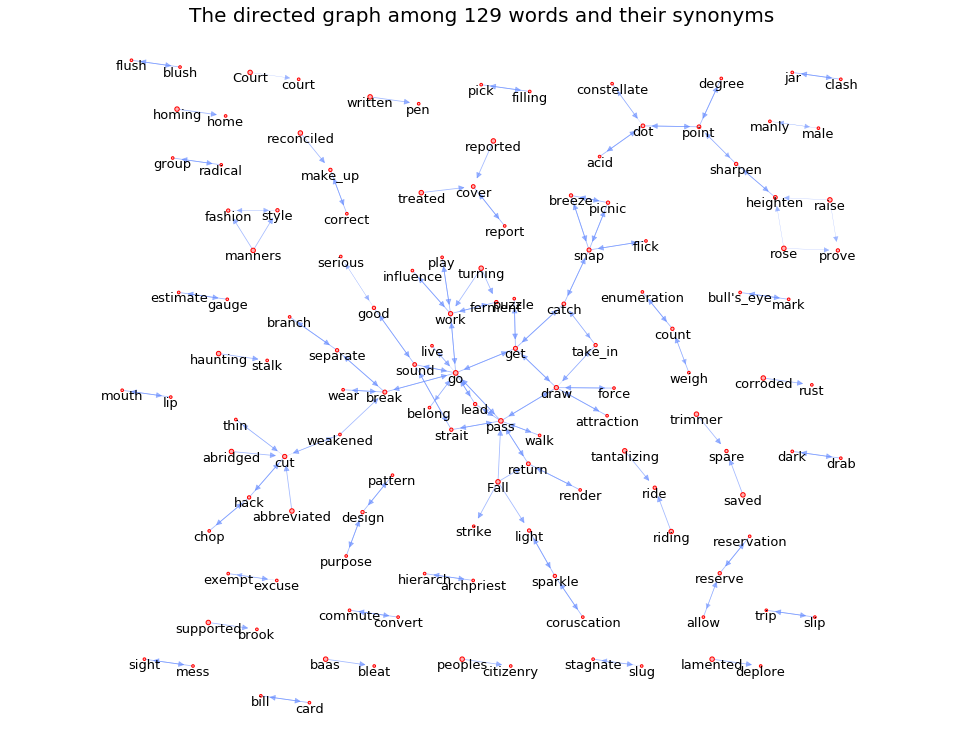

In [15]:
edge_width=[G[u][v]['weight'] for u,v in G.edges()]
edge_width=[w if type(w)==float else 0 for w in edge_width]
edge_width=[1*math.log(1.3+w) for w in edge_width]

nsi=[]
for n in G.nodes():
    if G.in_degree(n)>0:
        nsi.append(10*math.log(1+G.in_degree(n)))
    else:
        nsi.append(20)
figsize=(17,13)
pos=graphviz_layout(G) 

labels={}
for n in G.nodes():
    labels[n]=""
    
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,arrowsize=12, width=edge_width,edge_color=edge_color,alpha=0.6)
# nx.draw_networkx_labels(G,pos,labels=labels)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -10 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=13);
# st1="graph of %i words \n in a random sample of %i words and their synonyms" %(len(G),nos)
sst="The directed %s" %st
plt.title(sst,fontsize=20);
plt.margins(x=0.1, y=0) 

In [16]:
# nsi=[]
# for n in G.nodes():
#     if G.in_degree(n)>0:
#         nsi.append(10*math.log(1+G.in_degree(n)))
#     else:
#         nsi.append(20)
# figsize=(17,13)
# pos=graphviz_layout(G) 

# labels={}
# for n in G.nodes():
#     labels[n]=""
    
# node_color="#ffb3b3"
# node_border_color="r"
# edge_color="#668cff"
# plt.figure(figsize=figsize);
# nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=nsi)
# nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(G, pos,arrowsize=12, edge_color=edge_color,alpha=0.6)
# nx.draw_networkx_labels(G,pos,labels=labels)
# # nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
# plt.axis('off');
# yoffset = {}
# y_off = -20 # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# # nx.draw_networkx_labels(G, yoffset,font_size=13);
# # st1="graph of %i words \n in a random sample of %i words and their synonyms" %(len(G),nos)
# sst="The directed %s" %st
# plt.title(sst,fontsize=20);
# plt.margins(x=0.1, y=0) 

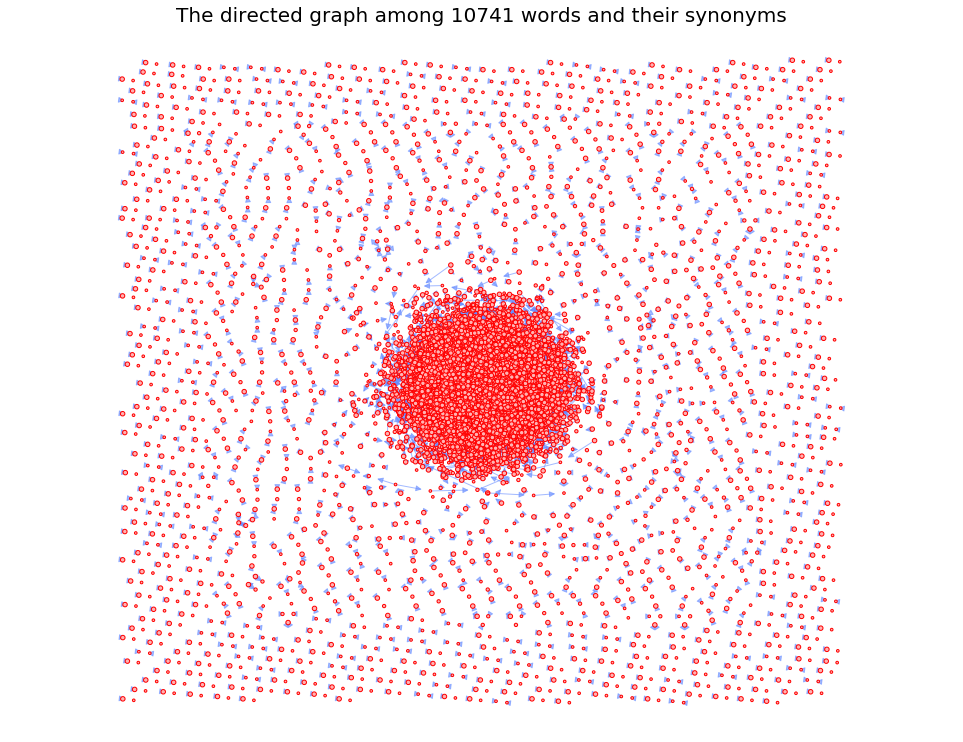

In [17]:
from IPython.display import Image
Image(filename='allDirected.png',width=800, height=400)

In [18]:
giant = max(nx.weakly_connected_components(G), key=len)
Glwcc=G.subgraph(giant)

st1="weakly connected component of the directed %s" %st
# graph of %i words \n in a random sample of %i words and their synonyms" %(len(G),nos)
g_diagnostics(Glwcc,st1)

The weakly connected component of the directed graph among 129 words and their synonyms has 44 nodes and 91 edges 

The weakly connected component of the directed graph among 129 words and their synonyms is a directed graph
The weakly connected component of the directed graph among 129 words and their synonyms graph is a weighted graph
The weakly connected component of the directed graph among 129 words and their synonyms graph is not strongly connected and it has 8 strongly connected components
The largest strongly connected component of this graph has 31 nodes and 70 edges
The weakly connected component of the directed graph among 129 words and their synonyms is a weakly connected graph
The density of the weakly connected component of the directed graph among 129 words and their synonyms is 0.048
The transitivity of the weakly connected component of the directed graph among 129 words and their synonyms is 0.079
The reciprocity of the weakly connected component of the directed graph a

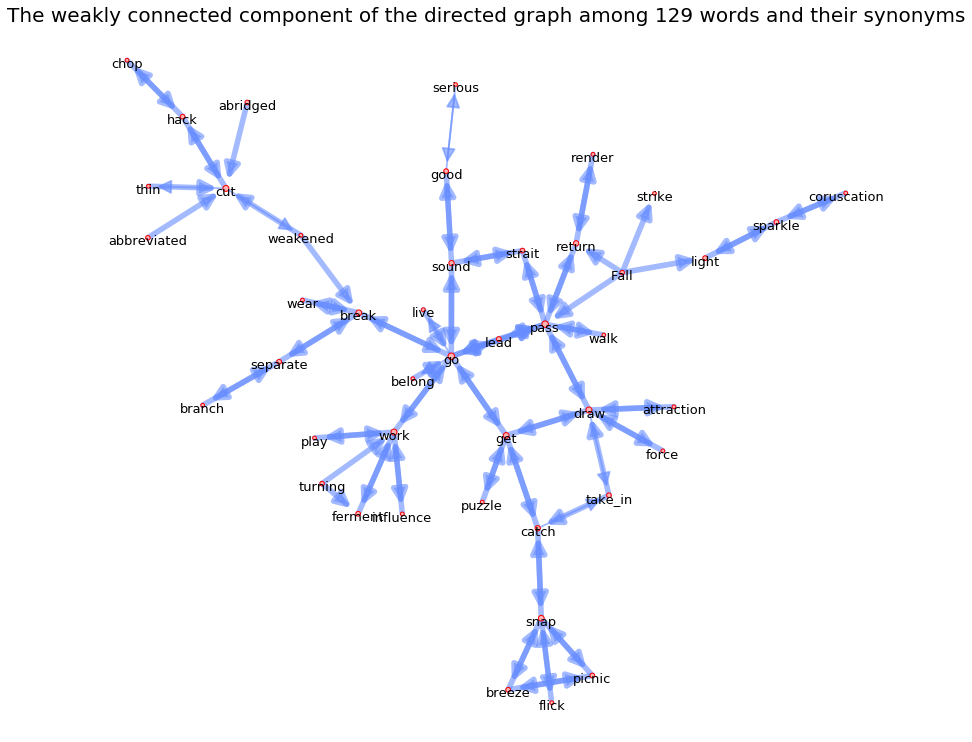

In [19]:
edge_width=[Glwcc[u][v]['weight'] for u,v in Glwcc.edges()]
edge_width=[w if type(w)==float else 0 for w in edge_width]
edge_width=[7*math.log(1.3+w) for w in edge_width]

nsi=[]
for n in Glwcc.nodes():
    if Glwcc.in_degree(n)>0:
        nsi.append(20*math.log(1+Glwcc.in_degree(n)))
    else:
        nsi.append(20)
figsize=(17,13)
pos=graphviz_layout(Glwcc) 

labels={}
for n in Glwcc.nodes():
    labels[n]=""
    
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Glwcc, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Glwcc, pos,arrowsize=30,width=edge_width, edge_color=edge_color,alpha=0.6)
# nx.draw_networkx_labels(Glscc,pos,labels=labels)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -4 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Glwcc, yoffset,font_size=13);
st1="The weakly connected component of the directed %s" %st
# graph of %i words \n in a random sample of %i words and their synonyms" %(len(G),nos)
sst=st1
plt.title(sst,fontsize=20);
plt.margins(x=0.1, y=0) 

In [20]:
# nsi=[]
# for n in Glscc.nodes():
#     if Glscc.in_degree(n)>0:
#         nsi.append(20*math.log(1+Glscc.in_degree(n)))
#     else:
#         nsi.append(20)
# figsize=(17,13)
# pos=graphviz_layout(Glscc) 

# labels={}
# for n in Glscc.nodes():
#     labels[n]=""
    
# node_color="#ffb3b3"
# node_border_color="r"
# edge_color="#668cff"
# plt.figure(figsize=figsize);
# nodes = nx.draw_networkx_nodes(Glscc, pos, node_color=node_color,node_size=nsi)
# nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(Glscc, pos,arrowsize=12, edge_color=edge_color,alpha=0.6)
# nx.draw_networkx_labels(Glscc,pos,labels=labels)
# # nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
# plt.axis('off');
# yoffset = {}
# y_off = -10 # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# # nx.draw_networkx_labels(Glscc, yoffset,font_size=13);
# st1="The strongly connected component of the directed %s" %st
# # graph of %i words \n in a random sample of %i words and their synonyms" %(len(G),nos)
# sst=st1
# plt.title(sst,fontsize=20);
# plt.margins(x=0.1, y=0) 

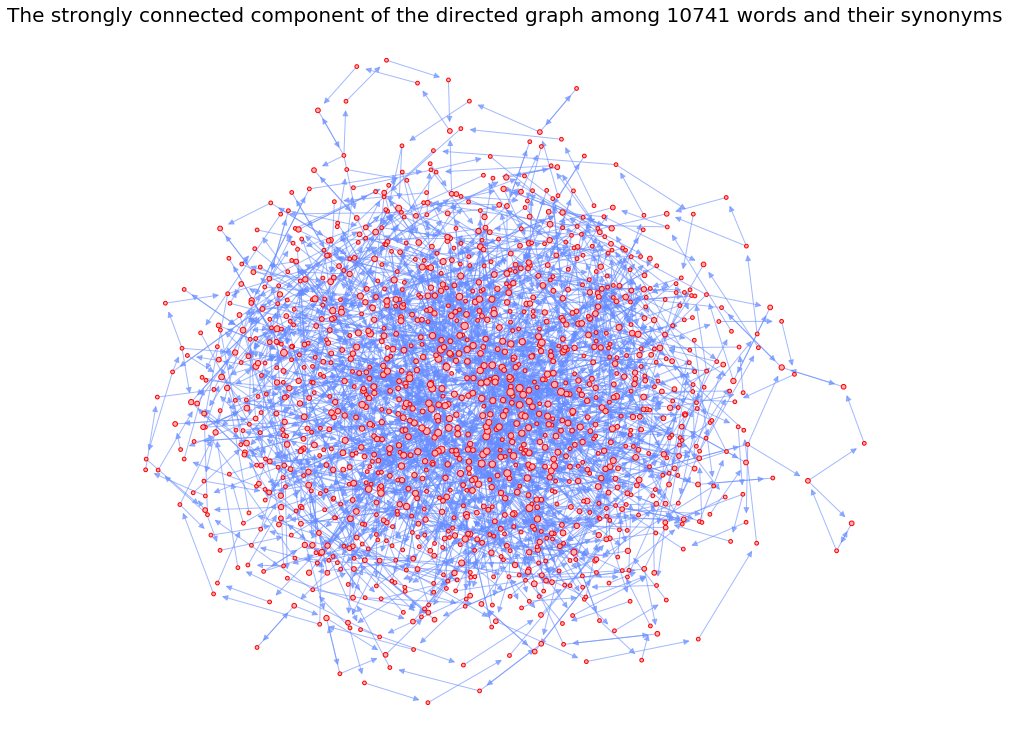

In [21]:
Image(filename='allDirectedLSCC.png',width=800, height=400)

In [22]:
# for e in G.edges(data=True):
#     print(e)

In [23]:
reds=[]
for e in G.edges(data=True):
    if (e[1],e[0]) in G.edges():
        reds.append(e)
print(len(reds)) #,len(set(reds)))
# for e in reds:
#     if (e[1],e[0]) in reds:
#         reds.remove(e)
# print(len(reds)) #,len(set(reds)))

144


In [24]:
# for e in reds:
#     print(e)

In [25]:
Gr=nx.Graph()
Gr.add_weighted_edges_from(reds)

st1="subgraph of reciprocating references among %i words and their synonyms" %len(Gr)
g_diagnostics(Gr,st1)

The subgraph of reciprocating references among 93 words and their synonyms has 93 nodes and 72 edges 

The subgraph of reciprocating references among 93 words and their synonyms is an undirected graph
The subgraph of reciprocating references among 93 words and their synonyms graph is a weighted graph
The subgraph of reciprocating references among 93 words and their synonyms graph is a disconnected graph and it has 26 connected components
The largest connected component of this graph has 31 nodes and 35 edges
The density of the subgraph of reciprocating references among 93 words and their synonyms is 0.017
The transitivity of the subgraph of reciprocating references among 93 words and their synonyms is 0.058


In [26]:
# for e in Gr.edges(data=True):
#     print(e)

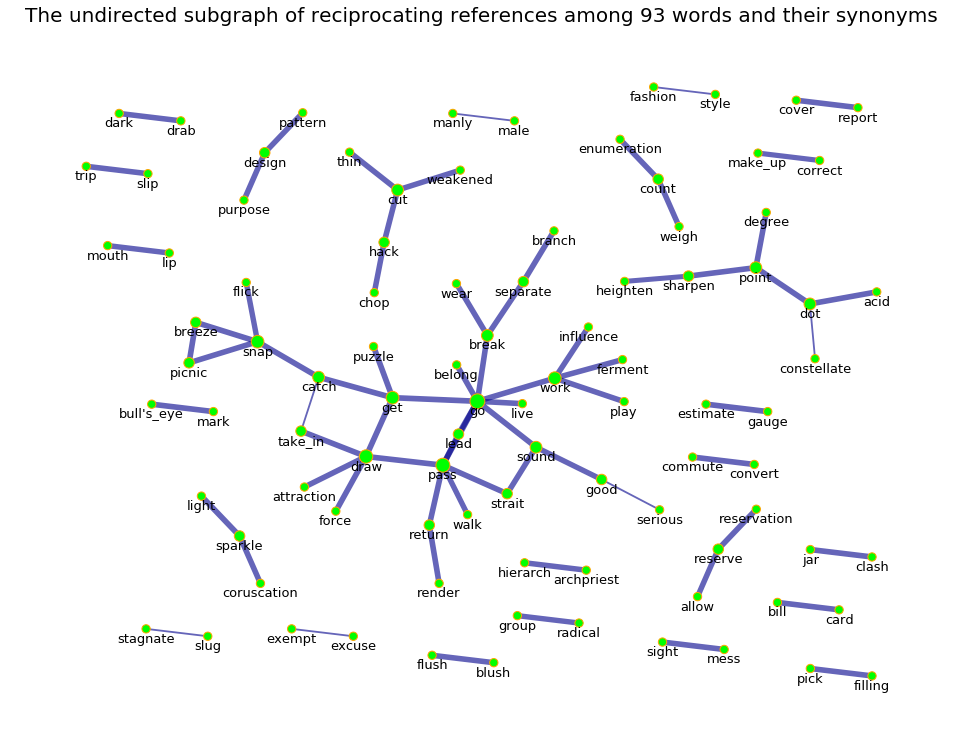

In [27]:
edge_width=[Gr[u][v]['weight']['weight'] for u,v in Gr.edges()]
edge_width=[w if type(w)==float else 0 for w in edge_width]
edge_width=[7*math.log(1.3+w) for w in edge_width]

nsi=[]
for n in Gr.nodes():
    if Gr.degree(n)>0:
        nsi.append(100*math.log(1+Gr.degree(n)))
    else:
        nsi.append(20)
figsize=(17,13)
pos=graphviz_layout(Gr) 

labels={}
for n in Gr.nodes():
    labels[n]=""
    
node_color="lime"
node_border_color="orange"
edge_color="darkblue"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gr, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gr, pos,width=edge_width,edge_color=edge_color,alpha=0.6)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -15 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gr, yoffset,font_size=13);
# st1="subgraph of %i reciprocating references to synonyms \n in the %s" %(len(Gr),st)
sst="The undirected %s" %st1
plt.title(sst,fontsize=20);
plt.margins(x=0.1, y=0.1) 

In [28]:
# nsi=[]
# for n in Gr.nodes():
#     if Gr.degree(n)>0:
#         nsi.append(100*math.log(1+Gr.degree(n)))
#     else:
#         nsi.append(20)
# figsize=(17,13)
# pos=graphviz_layout(Gr) 

# labels={}
# for n in Glscc.nodes():
#     labels[n]=""
    
# node_color="lime"
# node_border_color="orange"
# edge_color="darkblue"
# plt.figure(figsize=figsize);
# nodes = nx.draw_networkx_nodes(Gr, pos, node_color=node_color,node_size=nsi)
# nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(Gr, pos,edge_color=edge_color,alpha=0.6)
# # nx.draw_networkx_labels(G, pos)
# # nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
# plt.axis('off');
# yoffset = {}
# y_off = -15 # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# # nx.draw_networkx_labels(Gr, yoffset,font_size=13);
# # st1="subgraph of %i reciprocating references to synonyms \n in the %s" %(len(Gr),st)
# sst="The undirected %s" %st1
# plt.title(sst,fontsize=20);
# plt.margins(x=0.1, y=0.1) 

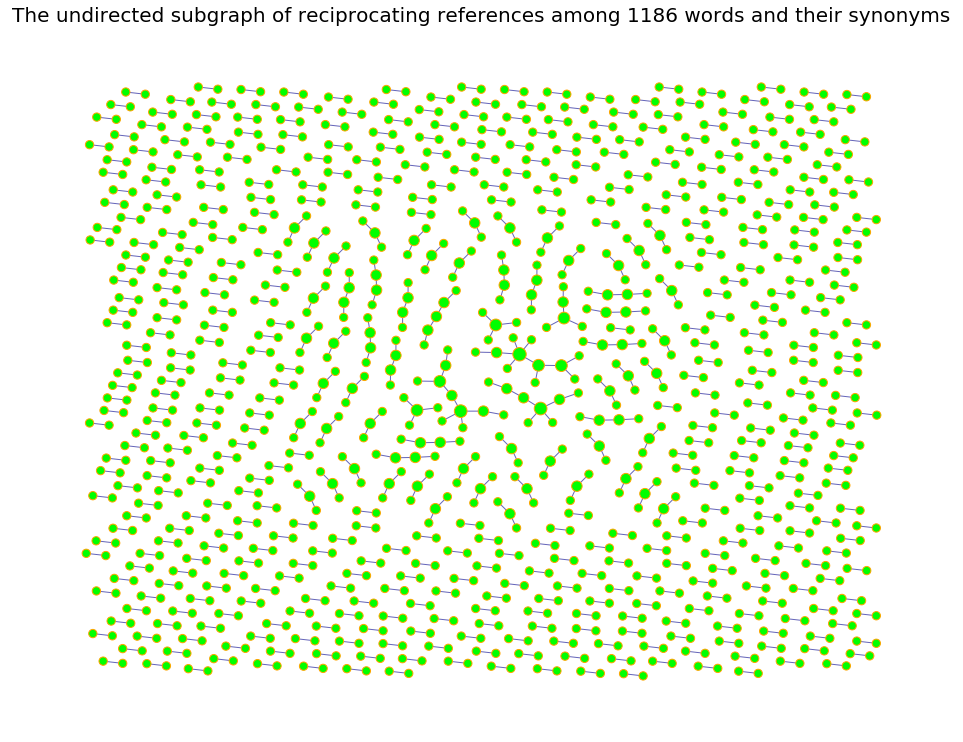

In [29]:
Image(filename='allReci.png',width=800, height=400)

In [30]:
giant = max(nx.connected_components(Gr), key=len)
Grlscc=Gr.subgraph(giant)

st2="largest connected component of the undirected %s" %st1
# graph of reciprocating synonyms of %i words \n in a random sample of %i words and their synonyms" %(len(G),nos)
g_diagnostics(Grlscc,st2)

The largest connected component of the undirected subgraph of reciprocating references among 93 words and their synonyms has 31 nodes and 35 edges 

The largest connected component of the undirected subgraph of reciprocating references among 93 words and their synonyms is an undirected graph
The largest connected component of the undirected subgraph of reciprocating references among 93 words and their synonyms graph is a weighted graph
The largest connected component of the undirected subgraph of reciprocating references among 93 words and their synonyms is a connected graph
The density of the largest connected component of the undirected subgraph of reciprocating references among 93 words and their synonyms is 0.075
The transitivity of the largest connected component of the undirected subgraph of reciprocating references among 93 words and their synonyms is 0.068


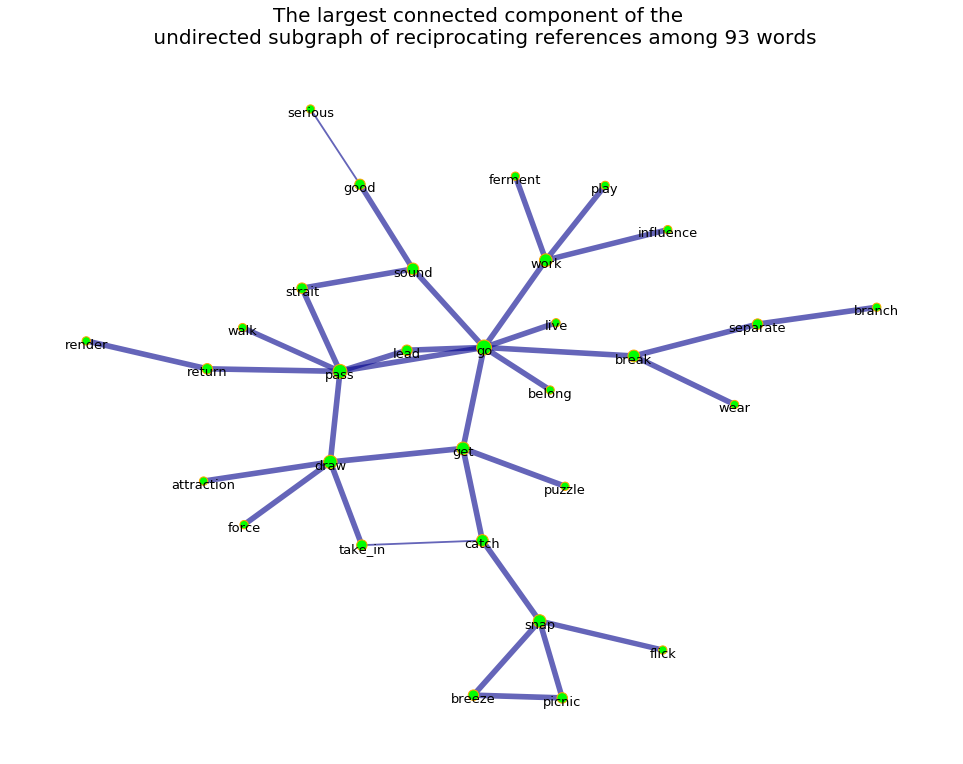

In [31]:
edge_width=[Grlscc[u][v]['weight']['weight'] for u,v in Grlscc.edges()]
edge_width=[w if type(w)==float else 0 for w in edge_width]
edge_width=[7*math.log(1.3+w) for w in edge_width]

nsi=[]
for n in Grlscc.nodes():
    if Grlscc.degree(n)>0:
        nsi.append(100*math.log(1+Grlscc.degree(n)))
    else:
        nsi.append(20)
figsize=(17,13)
pos=graphviz_layout(Grlscc) 

node_color="lime"
node_border_color="orange"
edge_color="darkblue"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Grlscc, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Grlscc, pos,width=edge_width,edge_color=edge_color,alpha=0.6)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -4 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Grlscc, yoffset,font_size=13);
# st3="The largest connected component of the undirected %s" %st1
st3="The largest connected component of the \n undirected subgraph of reciprocating references among %i words" %len(Gr)
# subgraph of \n %i reciprocating references to synonyms \n in the %s" %(len(Grlscc),st)
sst=st3
plt.title(sst,fontsize=20);
plt.margins(x=0.1, y=0.1) 